In [10]:
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

from tf_sim.raytracer import RayTracer
from tf_sim.lens import LenticularLens
from tf_sim.camera import Camera
from tf_sim.source import RectangleSource
from tf_sim.blocker import RectangleBlocker

In [54]:
p_standard = 0.0005
# lenticular_list = []

lens_config = {
    "class": LenticularLens,
    "zo": 0.3,
    "w": 0.09,
    "h": 0.09,
    "R": p_standard / 0.2,
    "p": p_standard,
    "t": p_standard * 2,
    "n": 1.6357
}
camera_config = {
    "class": Camera,
    "z_camera": 0.878,
    "camera_radius": 0.031,
    "z_pupil": 0.026,
    "f_number": 2.8,
    "focal_length": 0.0733
}
source_config = {
    "class": RectangleSource,
    "x": 0,
    "y": 0.0,
    "z": 0,
    "w": 0.8,
    "h": 0.5
}
blocker_config = {
    "class": RectangleBlocker,
    "x": 0.012,
    "y": -0.00,
    "z": 0.0,
    "w": 0.00,
    "h": 0.02,
}
config = {
    "batch_size": 1000,
    "rays_per_pos": int(2 * np.pi * 2 * 10**5 * 0.007),
    "average_steradians": 0.007,
    "lens": lens_config,
    "camera": camera_config,
    "source": source_config,
    "blocker": blocker_config
}

using tf lens
0.4 -0.4 0.25 -0.25


  0%|          | 0/10000000 [00:00<?, ?it/s]

RectangeSource: generate_pos tracing
LenticularLens: angle_bound_phi_camera tracing
LenticularLens: angle_bound_phi_pinhole tracing
LenticularLens: calc_m tracing
LenticularLens: calc_m tracing
LenticularLens: angle_bounds_phi_lens tracing
LenticularLens: angle_bounds_phi_theta tracing
LenticularLens: refract tracing


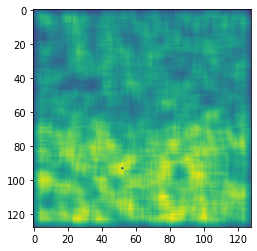

In [55]:
NUM_TO_PASS = 10 ** 7

IMG_RESOLUTION = 128

raytracer = RayTracer(config=config)

s = tf.constant(0.0)
pdf = tf.zeros(shape=(1, IMG_RESOLUTION, IMG_RESOLUTION, 1))

with (pbar := tqdm_notebook(total=NUM_TO_PASS)):
    while s.numpy() < NUM_TO_PASS:
        pdf, n_rays = raytracer.trace_for_pdf(pdf)
        s += n_rays
        pbar.update(n_rays.numpy())
        if not tf.math.is_finite(n_rays).numpy():
            print("i dont like this")

plt.imshow(tf.cast(pdf / tf.reduce_max(pdf) * 256, tf.uint8).numpy()[0])
plt.show()